# Проект:

Построение ML-продукта для выявления и оптимизации платежей преподавателей сервиса Repetit.ru

### Описание проекта

Сервис передает контакты клиента (ученика) репетитору. Если репетитор начинает заниматься с учеником, то он должен платить сервису комиссию от каждого занятия. Но в реальности так происходит не всегда. Иногда, это из-за того, что репетитор звонит по телефону и ему просто не отвечают. Некоторые репетиторы плохо договариваются о занятиях или обманывают. Сервис теряет деньги каждый раз, когда отдаёт заявку неэффективному репетитору. Заказчику нужно как можно раньше понять, что репетитор недобросовестный или мошенник, чтобы отключить его от сервиса и отдавать заявки ответственным репетиторам.
Сейчас эта задача решается ручным просмотром сотрудниками или никак.


### Задача

Разработать модель, которая по имеющейся информации о репетиторе и проведенных им занятий будет классифицировать репетиторов на платящих и неэффективных. Оценка качества модели будет производиться с использованием метрики F1

### Используемый стек технологий

•	Python  
•	Pandas  
•	Numpy  
•	Matplotlib, seaborn  
•	Scikit-learn   
•	DecisionTreeClassifier  
•	GradientBoostingClassifier  
•	XGBClassifier  
•	RandomForestClassifier  
•	LogisticRegression  


### Дополнительно

Признаки обмана, выявленные при ручной проверке  
Заказчик произвел ручную проверку репетиторов на предмет мошенничества (звонки клиентам и так далее). Выяснилось, что 20% обманывают нас так или иначе.  
•	Несоответствие цены в заявке, в анкете репетитора и реальной  
•	1 занятие на ученика (соотношение к общему кол-ву занятий)  
•	Разная стоимость с разными учениками  
•	Разная стоимость уроков с одним учеником  
•	Стоят занятия в расписании, а оплат нет  
•	Когда у репетитора по разным ученикам оплаты рядом по времени, то он сам оплачивает  
•	Как часто заходит в приложение - если редко, то сам оплачивает  
•	Статус заявки договорились о занятиях, оплат нет более недели (и не перенесено)  
o	status в orders = 9  
o	lessons с amount_payed > 0 за последнюю неделю  
•	Ученик не отмечен как завершенный, а оплат нет  (пример SQL запроса ниже)

SELECT * [lesson_course].id , (select count(lessons.id)   

from lessons where lessons.lesson_course_id=lesson_course.id and lessons.amount_paid is not NULL and lessons.lesson_date>getdate()-30) as 'оплат за последний месяц'

FROM [main].[dbo].[lesson_course] join orders on orders.id=lesson_course.order_id where orders.flags = 8 and orders.status_id in (6,14) and lesson_course.is_active=1 and (lesson_course.suspend_till_date is null or lesson_course.suspend_till_date <getdate())

•	Репетитор отчитался, что провёл платное занятие, оплаты нет (пример SQL запроса ниже)  

lesson_course.id , (select count(lessons.id) from lessons where lessons.
lesson_course_id=lesson_course.id and lessons.amount_paid is not NULL and lessons.lesson_date>getdate()-30) as 'оплат за последний месяц'

FROM [main].[dbo].[lesson_course] join orders on orders.id=lesson_course.order_id where orders.flags = 8 and lesson_course.is_active=1 and (lesson_course.suspend_till_date is null or lesson_course.suspend_till_date <getdate()) and (select count(lessons.id)

from lessons where lessons.lesson_course_id=lesson_course.id and lessons.amount_paid is not NULL and lessons.lesson_date>getdate()-30)=0 and (select count(id)

from reports where reports.order_id=orders.id and [description] = 'Проведено первое занятие' and [comments] not like '%Стоимость первого занятия - 0%' )>0 order by orders.id desc  


•	Цена ниже 500 р. в регионах, ниже 700 в мск  


____________________________________________________________________________

### Описание данных


Информация о репетиторах (teacher_info.feather)


•	id - айди репетитора  
•	reg_date - дата регистрации  
•	birth_date - дата рождения  
•	teaching_start_date - дата начала первого занятия  
•	is_email_confirmed - подтвержден ли e-mail адресс  
•	lesson_duration - продолжит урока  
•	lesson_cost - стоимость урока  
•	is_display - показывается в каталоге  
•	last_visited - послеждний визит  
•	is_pupils_needed - открыт для заявок  
•	is_cell_phone_confirmed - подтвержден ли номер телефона  
•	area_id - регион  
•	sex - пол  
•	orders_allowed - разрешено назначать на заявки  
•	review_num - отзывы  

Статистика по репетиторам и таргет (teachers.feather)  

•	id - айди репетитора  
•	lessons_delivered - поставлено уроков  
•	mean_lesson_price - средняя стоимость уроков  
•	lessons_given - оплачено уроков  
•	lessons_started_fraction - процент начала занятий  
•	lessons_per_pupil - занятий на ученика  
•	money_recieved - получено денег  
•	blocked - целевой признак (active/blocked)  


Ученики (lesson_course.feather)

•	Id - айди  
•	client_id - айди ученика  
•	teacher_id - айди репетитора  
•	order_id - айди заявки  
•	lesson_place - занятия онлайн или офлайн  
•	lesson_price - цена  
•	is_active - идут ли занятия, на паузе, завершены  
•	lesson_duration - продолжительность урока  
•	date_updated  
•	suspend_till_date  


Занятия (lessons.feather)

•	Id - айди  
•	lesson_course_id - айди ученика  
•	lesson_date - дата  
•	time_from - время от  
•	time_to - время до  
•	home_task - дз  
•	is_regular - автоматически повторяющееся занятие  
•	amount_to_pay - стоимость  
•	amount_paid - оплачено  


Цены на занятия репетиторов (teacher_prices.feather)

•	date_update - дата обновления цен  
•	teacher_id - айди репетитора  
•	subject_id - айди предмета  
•	price - цена занятий у себя  
•	price_external - цена занятий на выезде  
•	price_remote - цена онлайн занятий  


Заявки (orders.feather)  

•	order_date - дата создания  
•	subject_id - предмет  
•	purpose - цель занятий  
•	lesson_price - цена  
•	lesson_duration - желаемая проодолжительность урока  
•	home_metro_id - ближайшее метро  
•	add_info - доп инфо  
•	start_date  
•	working_teacher_id  
•	status_id - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)  
•	comments      
•	amount_to_pay  
•	planned_lesson_number - клиент планирует N занятий  
•	first_lesson_date - дата 1 занятия  
•	creator_id - кто создал заявку (id сотрудника или клиента)  
•	pupil_category_new_id - возраст ученика  
•	lessons_per_week - занятий а неделю  
•	minimal_price  
•	teacher_sex - пол репетитора  
•	teacher_experience_from - опыт репетитора от  
•	teacher_experience_to- опыт репетитора до  
•	lesson_place_new - онлайн, у ученика, у учителя  
•	pupil_knowledgelvl -уровень знаний ученика  
•	teacher_age_from - желаемый возраст репеитора от  
•	teacher_age_to - желаемый возраст репетитора от  
•	chosen_teachers_only - не предлагать репетиторов кроме выбранных
самостоятельно  
•	no_teachers_available - на заявку нет подходящих репов  
•	source_id - где создана заявка (какая часть сайта, не регион)  
•	original_order_id - дублем какой заявки является эта заявка  
•	client_id - айди клиента  
•	additional_status_id  
•	max_metro_distance - максимально готов ехать от метро  
•	estimated_fee  
•	payment_date  
•	test_group - аб тесты  
•	is_display_to_teachers - хочет ли клиент получать отклики репетиторов  





### План

**1. Знакомство с данными**

    1.1 Импорт библиотек
    
    1.2 Загрузка данных
    
    1.3 Исследовательский анализ данных (размер, признаки, строки, типы данных, пропуски, аномалии, дубликаты, кореляция, распределение)
    
 **2. Предобработка данных**
    
    2.1 Преобразование типов данных
    
    2.2 Разбиение на выборки
    
    2.3 Нормализация значений
    
 **3. Обучение моделей**


 **4. Вывод**

 **5. Отчет**

**************

## Импорт библиотек

Устанавливать библиотеки в рамках тетрадки - считается плохой практикой. Eсли заказчик или коллега захочет воспрозвести исследование он сможет установить все необходимые пакеты используя данный файл.


In [1]:
 pip install -q progress

In [2]:
pip install -q tqdm -U

In [3]:
pip install -q catboost

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# Загрузка данных

In [5]:
df_lesson_course = pd.read_feather('/content/lesson_course.feather')

In [6]:
df_lesson_course.shape

(893438, 10)

In [7]:
df_lesson_course.head()

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
0,240884,427831.00,133738,718009.00,2,1000,1,60,2021-04-25 23:08:17.883,2018-08-27 00:00:00.000
1,242243,429075.00,106838,720876.00,1,0,0,0,2021-12-03 23:05:52.873,2020-08-01 00:00:00.000
2,242364,429089.00,14700,720912.00,1,0,0,0,2022-05-25 07:27:15.077,2019-09-08 14:22:41.940
3,242476,428940.00,138783,721219.00,1,0,0,0,2021-06-22 20:36:53.287,2018-09-03 00:00:00.000
4,242942,424704.00,3476,720891.00,4,600,0,60,2021-12-19 13:29:29.257,2022-03-20 00:00:00.000


In [8]:
df_lessons= pd.read_feather('/content/lessons.feather')

In [9]:
df_lessons.shape

(1191127, 9)

In [10]:
df_lessons.head()

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
0,135797,347,2023-04-14 00:00:00.000,12:45:00,13:50:00,NaN,1,NaN,NaN
1,283596,185756,2022-11-15 00:00:00.000,20:30:00,21:30:00,NaN,0,NaN,NaN
2,322184,184189,2022-12-15 00:00:00.000,16:00:00,17:30:00,NaN,0,NaN,NaN
3,371621,213849,2023-02-13 00:00:00.000,19:30:00,20:30:00,NaN,0,NaN,NaN
4,375586,196475,2023-02-16 00:00:00.000,10:00:00,11:00:00,NaN,0,NaN,NaN


In [11]:
df_orders = pd.read_feather('/content/orders.feather')

In [12]:
df_orders.shape

(1191861, 38)

In [13]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,None,0,60,None,NaN,None,None,NaN,16,None,NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.00,None,0,60,None,NaN,None,None,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к зая...",NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,143480.00,16,None,NaN,0,7,None,NaN,14.00,2,0,3,0,0,4,0,0,0,0,0,23,NaN,1024439,10.00,NaN,1200,None,1
3,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,236392.00,16,None,NaN,0,10,None,47749.00,10.00,3,0,3,5,0,4,0,20,90,0,0,14,2293804.00,1024340,17.00,NaN,2310,None,1
4,2294058,2022-11-01 00:11:49.417,8.00,None,0,60,None,122.00,None,None,NaN,16,Тестовая группа : SplitTestA,NaN,0,0,None,NaN,NaN,0,0,0,0,0,2,0,0,0,0,0,16,NaN,1024440,5.00,NaN,None,None,1


In [14]:
df_teacher_prices = pd.read_feather('/content/teacher_prices.feather')

In [15]:
df_teacher_prices.shape

(432422, 6)

In [16]:
df_teacher_prices.head()

,date_update,teacher_id,subject_id,price,price_external,price_remote
0,2008-01-20 19:47:18.587,300.00,2,1200,1200,1200
1,2008-01-22 00:33:39.660,125.00,13,0,0,3000
2,2008-01-22 00:33:39.660,125.00,14,0,0,3000
3,2008-01-22 00:37:01.963,91.00,8,2000,0,0
4,2008-02-08 21:27:19.177,372.00,33,400,400,400


In [17]:
df_teachers = pd.read_feather('/content/teachers.feather')

In [18]:
df_teachers.shape

(1656, 8)

In [19]:
df_teachers.head()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0
2,42869,505.00,2500.00,184.00,0.14,61.33,460000.00,0
3,127280,442.00,1879.34,363.00,0.15,60.50,682200.00,0
4,283905,694.00,1252.43,534.00,0.26,59.33,668800.00,0


In [20]:
df_teachers_info = pd.read_feather('/content/teachers_info.feather')

In [21]:
df_teachers_info.head()

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
0,33,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,0,60,1000,1,2022-10-24 16:48:38.410,1.00,0,1,1,0,6
1,46,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,0,60,500,0,None,1.00,0,1,3,1,0
2,51,2007-12-24 19:26:46.000,1965-04-30 00:00:00.000,1988-09-01 00:00:00.000,0,60,1500,0,2022-09-26 09:43:56.123,1.00,0,1,2,1,0
3,52,2007-12-24 19:26:46.000,1988-07-06 00:00:00.000,2006-09-01 00:00:00.000,0,60,1000,1,2020-04-03 15:53:50.867,0.00,0,1,2,1,2
4,54,2007-12-24 19:26:46.000,1985-09-30 00:00:00.000,2004-01-01 00:00:00.000,0,45,400,0,None,1.00,0,1,3,1,0


Получены 6 таблиц с данными

df_teachers_info - Информация о репетиторах

df_teachers - Статистика по репетиторам и таргет

df_lesson_course - Ученики

df_lessons - Занятия

df_teacher_prices - Цены на занятия репетиторов

df_orders - Заявки

# Исследовательский анализ данных

Удалим признак дающий утечку orders_allowed из таблицы df_teachers_info

In [22]:
df_teachers_info.drop('orders_allowed', axis = 1, inplace = True)

Очевидно, что таблицы связаны друг с другом посредством данных в признаках, для удобства анализа соединим их в один большой датасет по схеме


1.	В таблицах df_teachers и df_teachers_info столбцы id переименуем в teachers_id
2.	Присоединяем к df_teachers_info таблицу df_teachers и df_teachers_prices по столбцу teachers_id
3.	Получили таблицу df_teachers
4.	В таблице df_lesson_course столбец id переименуем в lesson_course_id
5.	В таблице df_lessons столбец id переименуем в lessons_id
6.	Присоединяем к df_lesson_course таблицу df_lessons по столбцу lesson_course_id
7.	Получили таблицу df_lessons
8.	Присоединяем к df_teachers таблицу df_lessons по столбцу teachers_id
9.	Получили таблицу df
10.	В таблице df_orders столбец id переименуем в orders_id
11.	Присоединяем к df  таблицу df_orders по столбцу client_id




1.	В таблицах df_teachers и df_teachers_info столбцы id переименуем в teachers_id
2.	Присоединяем к df_teachers таблицу df_teachers_info и df_teacher_prices по столбцу teachers_id

In [23]:
df_teachers = df_teachers.rename({'id': 'teacher_id'}, axis=1)

In [24]:
df_teachers_info = df_teachers_info.rename({'id': 'teacher_id'}, axis=1)

Проверим наличие одинаковых столбцов до присоединения.

In [25]:
list(df_teachers[df_teachers.columns.intersection(df_teachers_info.columns)])

['teacher_id']

In [26]:
list(df_teachers_info[df_teachers.columns.intersection(df_teacher_prices.columns)])

['teacher_id']

Имеем только столбец - ключ, присоединяем таблицы, на каждом шаге контролируем изменение размера таблиц

In [27]:
df_teachers.shape

(1656, 8)

In [28]:
df_teachers_new_1 = df_teachers.merge(df_teachers_info, 'left', on = 'teacher_id')

In [29]:
df_teachers_new_1.shape

(1656, 21)

In [30]:
df_teachers_new = df_teachers_new_1.merge(
        df_teacher_prices, 'left', on = 'teacher_id')

In [31]:
df_teachers_new.shape

(3064, 26)

3.	Получили таблицу df_teachers_new
4.	В таблице df_lesson_course столбец id переименуем в lesson_course_id
5.	В таблице df_lessons столбец id переименуем в lessons_id
6.	Присоединяем к df_lesson_course таблицу df_lessons по столбцу lesson_course_id

In [32]:
df_lesson_course = df_lesson_course.rename({'id': 'lesson_course_id'}, axis=1)

In [33]:
df_lessons = df_lessons.rename({'id': 'lesson_id'}, axis=1)

Проверим наличие одинаковых столбцов до присоединения.

In [34]:
list(df_lessons[df_lessons.columns.intersection(df_lesson_course.columns)])

['lesson_course_id']

Имеем только столбец - ключ, присоединяем таблицы

In [35]:
df_lessons_new = df_lessons.merge(df_lesson_course, 'left', on = 'lesson_course_id')

In [36]:
df_lessons_new.shape

(1191127, 18)

7.	Получили таблицу df_lessons_new
8.	Присоединяем к df_teachers_new таблицу df_lessons_new по столбцу teacher_id
9.	Получили таблицу df

Проверим наличие одинаковых столбцов до присоединения.

In [37]:
list(df_teachers_new[df_teachers_new.columns.intersection(df_lessons_new.columns)])

['teacher_id', 'lesson_duration']

Имеем только столбец - ключ, присоединяем таблицы

Таблицы df_teachers_new и df_lessons_new имеют 2 столбца с одинаковым названием, но разными значениями. После объединения они получат суффиксы _x и _y. Переименуем их до объединения.

In [38]:
df = df_teachers_new.merge(df_lessons_new, 'left', on = 'teacher_id')

In [39]:
df.shape

(642727, 43)

10.	В таблице df_orders столбец id переименуем в order_id
11.	Присоединяем к df  таблицу df_orders по столбцу client_id

In [40]:
df_orders = df_orders.rename({'id': 'order_id'}, axis=1)

In [41]:
df = df.merge(df_orders, 'inner', on = 'client_id')

In [42]:
df.shape

(2832737, 80)

## Общая информация

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832737 entries, 0 to 2832736
Data columns (total 80 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   teacher_id                int64   
 1   lessons_delivered         float64 
 2   mean_lesson_price         float64 
 3   lessons_given             float64 
 4   lessons_started_fraction  float64 
 5   lessons_per_pupil         float64 
 6   money_recieved            float64 
 7   blocked                   int64   
 8   reg_date                  object  
 9   birth_date                object  
 10  teaching_start_date       object  
 11  is_email_confirmed        float64 
 12  lesson_duration_x         float64 
 13  lesson_cost               float64 
 14  is_display                float64 
 15  last_visited              object  
 16  is_pupils_needed          float64 
 17  is_cell_phone_confirmed   float64 
 18  area_id                   float64 
 19  sex                       float64 
 20  re

Таблиц содержат типы данных int, float, object, category.




In [44]:
df.head(2)

,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay_x,amount_paid,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,purpose,lesson_price_y,lesson_duration,lesson_place_y,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay_y,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04 10:22:23.207,1997-04-16 00:00:00.000,2017-09-01 00:00:00.000,0.00,60.00,800.00,1.00,2022-10-21 16:44:49.877,NaN,0.00,2.00,1.00,10.00,2020-04-06 16:53:51.313,9,1700,0,1700,1706574.00,781280.00,2021-09-03 00:00:00.000,16:00:00,17:30:00,NaN,0.00,NaN,NaN,723033.00,1720858.00,4.00,1200.00,0.00,90.00,2021-08-31 23:12:49.487,1800-01-01 00:00:00.000,1799080,2021-09-29 15:24:21.917,8.00,"Разделы: школьный курс.\nДополнения: ЕГЭ, мат...",700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2021-10-01 16:55:16.097,66174.00,16,Тестовая группа : SplitTestA,NaN,0,10,None,NaN,12.00,5,500,3,0,0,4,0,0,0,1,0,16,NaN,10.00,NaN,1050,None,1
1,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04 10:22:23.207,1997-04-16 00:00:00.000,2017-09-01 00:00:00.000,0.00,60.00,800.00,1.00,2022-10-21 16:44:49.877,NaN,0.00,2.00,1.00,10.00,2020-04-06 16:53:51.313,9,1700,0,1700,1706574.00,781280.00,2021-09-03 00:00:00.000,16:00:00,17:30:00,NaN,0.00,NaN,NaN,723033.00,1720858.00,4.00,1200.00,0.00,90.00,2021-08-31 23:12:49.487,1800-01-01 00:00:00.000,1799088,2021-09-29 15:26:20.790,8.00,None,0,60,None,NaN,None,None,NaN,7,Тестовая группа : SplitTestA\n29.09.2021 17:15...,NaN,0,0,None,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,16,1799080.00,7.00,NaN,None,None,1


Перечень столбцов, которые содержат даты

In [45]:
date_col_df = [file for file in df.columns.to_list() if 'date' in file]
date_col_df.append('last_visited')

In [46]:
date_col_df

['reg_date',
 'birth_date',
 'teaching_start_date',
 'date_update',
 'lesson_date',
 'date_updated',
 'suspend_till_date',
 'order_date',
 'start_date',
 'first_lesson_date',
 'payment_date',
 'last_visited']

в таблице df 'reg_date', 'birth_date', 'teaching_start_date', 'date_update',
'lesson_date', 'date_updated', 'suspend_till_date', 'order_date', 'start_date', 'first_lesson_date', 'payment_date' - содержат информацию о датах, нужно изменить тип данных на datetime. Вероятно, что при анализе и обучении модели часы, минуты и секунды значения не имеют, для лучшего восприятия оставим только даты.



In [47]:
def col_to_datetime(data, col_list):
  for i in col_list:
    data[i] = pd.to_datetime(data[i], errors = 'coerce').dt.normalize()
  return data

In [48]:
df = col_to_datetime(df, date_col_df)

In [49]:
df.head(2)

,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay_x,amount_paid,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,purpose,lesson_price_y,lesson_duration,lesson_place_y,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay_y,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04,1997-04-16,2017-09-01,0.00,60.00,800.00,1.00,2022-10-21,NaN,0.00,2.00,1.00,10.00,2020-04-06,9,1700,0,1700,1706574.00,781280.00,2021-09-03,16:00:00,17:30:00,NaN,0.00,NaN,NaN,723033.00,1720858.00,4.00,1200.00,0.00,90.00,2021-08-31,1800-01-01,1799080,2021-09-29,8.00,"Разделы: школьный курс.\nДополнения: ЕГЭ, мат...",700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2021-10-01,66174.00,16,Тестовая группа : SplitTestA,NaN,0,10,NaT,NaN,12.00,5,500,3,0,0,4,0,0,0,1,0,16,NaN,10.00,NaN,1050,NaT,1
1,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04,1997-04-16,2017-09-01,0.00,60.00,800.00,1.00,2022-10-21,NaN,0.00,2.00,1.00,10.00,2020-04-06,9,1700,0,1700,1706574.00,781280.00,2021-09-03,16:00:00,17:30:00,NaN,0.00,NaN,NaN,723033.00,1720858.00,4.00,1200.00,0.00,90.00,2021-08-31,1800-01-01,1799088,2021-09-29,8.00,None,0,60,None,NaN,None,NaT,NaN,7,Тестовая группа : SplitTestA\n29.09.2021 17:15...,NaN,0,0,NaT,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,16,1799080.00,7.00,NaN,None,NaT,1


Получена таблица df с признаками даты с типом данных datetime и форматом год-месяц-дата

## Пропуски

In [50]:
df_nan = pd.DataFrame(df.isna().mean().sort_values(ascending=False), columns=['nan'])
df_nan

,nan
prefered_teacher_id,1.00
lesson_place_y,1.00
home_task,1.00
max_metro_distance,1.00
amount_paid,0.97
is_pupils_needed,0.97
payment_date,0.84
home_metro_id,0.76
comments,0.72
first_lesson_date,0.67


В таблице есть столбцы, в которых пропуски составляют 20% и более. Удалим такие столбцы, т.к. большое количество пропусков делает их менее эффективными. Но при этом нужно сохранить целевой признак blocked. Поэтому пропуски в признаке blocked нужно заполнить, вероятнее всего пропуски нулевыми значениями - не заблокирован.

In [51]:
df['blocked'].isna().mean()

0.0

In [52]:
df['blocked'].value_counts()

blocked
0    2299799
1     532938
Name: count, dtype: int64

Функция для удаления столбцов с пропусками более 20% кроме целевого признака blocked

In [53]:
def col_dropna(data):
  new_data = pd.DataFrame(data.isna().mean(), columns =['nan'])
  col_del = new_data[(new_data['nan'] > 0.20)].index.to_list()
  data = data.drop(col_del, axis= 1 , inplace = True)

  return data

In [54]:
df.shape

(2832737, 80)

In [55]:
col_dropna(df)

In [56]:
df.shape

(2832737, 63)

Из таблицы df удалено 17 столбцов по признаку - пропусков больше 20%

Пропуски в строках тоже удаляем - данных для обучения достаточно

In [57]:
df.isna().mean()

teacher_id                 0.00
lessons_delivered          0.00
mean_lesson_price          0.00
lessons_given              0.00
lessons_started_fraction   0.00
lessons_per_pupil          0.00
money_recieved             0.00
blocked                    0.00
reg_date                   0.00
birth_date                 0.00
teaching_start_date        0.00
is_email_confirmed         0.00
lesson_duration_x          0.00
lesson_cost                0.00
is_display                 0.00
last_visited               0.06
is_cell_phone_confirmed    0.00
area_id                    0.00
sex                        0.00
review_num                 0.00
date_update                0.00
subject_id_x               0.00
price                      0.00
price_external             0.00
price_remote               0.00
lesson_id                  0.00
lesson_course_id           0.00
lesson_date                0.00
time_from                  0.00
time_to                    0.00
is_regular                 0.00
client_i

In [58]:
df = df.dropna().reset_index()

In [59]:
df.shape

(2297806, 64)

Удалены пропуски по строкам и столбцам. Размер таблиц уменьшился, попробуем соединить df и df_orders по столбцу client_id. В таблице df общий столбец имеет тип данных float, а в df_orders  - int. Сделаем оба - int.

In [60]:
df['client_id'] = df['client_id'].astype(int)

In [61]:
df['client_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2297806 entries, 0 to 2297805
Series name: client_id
Non-Null Count    Dtype
--------------    -----
2297806 non-null  int64
dtypes: int64(1)
memory usage: 17.5 MB


Сохраним таблицы

## Дубликаты

Количество уникальных значений в каждом столбце немного меньше количества строк - значения повторяются. Следует проверить на дубликаты.

In [62]:
df.duplicated().mean()*100

0.0

Дубликатов нет

In [63]:
df.columns

Index(['index', 'teacher_id', 'lessons_delivered', 'mean_lesson_price',
       'lessons_given', 'lessons_started_fraction', 'lessons_per_pupil',
       'money_recieved', 'blocked', 'reg_date', 'birth_date',
       'teaching_start_date', 'is_email_confirmed', 'lesson_duration_x',
       'lesson_cost', 'is_display', 'last_visited', 'is_cell_phone_confirmed',
       'area_id', 'sex', 'review_num', 'date_update', 'subject_id_x', 'price',
       'price_external', 'price_remote', 'lesson_id', 'lesson_course_id',
       'lesson_date', 'time_from', 'time_to', 'is_regular', 'client_id',
       'order_id_x', 'lesson_place_x', 'lesson_price_x', 'is_active',
       'lesson_duration_y', 'date_updated', 'suspend_till_date', 'order_id_y',
       'order_date', 'subject_id_y', 'purpose', 'lesson_price_y',
       'lesson_duration', 'add_info', 'status_id', 'amount_to_pay_y',
       'planned_lesson_number', 'pupil_category_new_id', 'lessons_per_week',
       'minimal_price', 'teacher_sex', 'teacher_exper

Получена новая таблица с данными и новым перечнем столбцов.

## Типы данных

Удалим столбцы с текстовыми данными, попробуем обучить модель сначала без них

In [64]:
df.drop(['purpose', 'add_info'], axis=1, inplace=True)

Удалим ненужный столбец index

In [65]:
df.drop(['index'], axis=1, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297806 entries, 0 to 2297805
Data columns (total 61 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   teacher_id                int64         
 1   lessons_delivered         float64       
 2   mean_lesson_price         float64       
 3   lessons_given             float64       
 4   lessons_started_fraction  float64       
 5   lessons_per_pupil         float64       
 6   money_recieved            float64       
 7   blocked                   int64         
 8   reg_date                  datetime64[ns]
 9   birth_date                datetime64[ns]
 10  teaching_start_date       datetime64[ns]
 11  is_email_confirmed        float64       
 12  lesson_duration_x         float64       
 13  lesson_cost               float64       
 14  is_display                float64       
 15  last_visited              datetime64[ns]
 16  is_cell_phone_confirmed   float64       
 17  area_id 

Следует изменить типы данных признаков:

1. float на int, не имеют значений после запятой

lessons_delivered  
lessons_given  
is_email_confirmed  
lesson_duration_teachers  
is_display  
is_cell_phone_confirmed  
area_id   
sex    
review_num  
lesson_id                  
lesson_course_id   
is_regular     
order_id_x     
lesson_place_x               
is_active             
subject_id_y     
pupil_category_new_id      

2. category на datetime, тип данных время

time_from         
time_to




3. object на float, стоимость

amount_to_pay_y   


In [67]:
col_to_int = [
    'lessons_delivered', 'lessons_given', 'is_email_confirmed',
    'is_display', 'is_cell_phone_confirmed',
    'area_id', 'sex', 'review_num', 'lesson_id',
    'lesson_course_id', 'is_regular', 'order_id_x', 'lesson_place_x',
    'is_active', 'subject_id_y', 'pupil_category_new_id'
            ]

In [68]:
for i in col_to_int:
  df[i] = df[i].astype('int')

In [69]:
'''
df.amount_to_pay_y= df.amount_to_pay_y.astype('float')



ValueError                                Traceback (most recent call last)
<ipython-input-33-f3d31dca8aaf> in <cell line: 1>()
----> 1 df.amount_to_pay= df.amount_to_pay.astype('float')

6 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py in astype_nansafe(arr, dtype, copy, skipna)
    168     if copy or is_object_dtype(arr.dtype) or is_object_dtype(dtype):
    169         # Explicit copy, or required since NumPy can't view from / to object.
--> 170         return arr.astype(dtype, copy=True)
    171
    172     return arr.astype(dtype, copy=copy)

ValueError: could not convert string to float: '937,5'
'''

"\ndf.amount_to_pay_y= df.amount_to_pay_y.astype('float')\n\n\n\nValueError                                Traceback (most recent call last)\n<ipython-input-33-f3d31dca8aaf> in <cell line: 1>()\n----> 1 df.amount_to_pay= df.amount_to_pay.astype('float')\n\n6 frames\n/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py in astype_nansafe(arr, dtype, copy, skipna)\n    168     if copy or is_object_dtype(arr.dtype) or is_object_dtype(dtype):\n    169         # Explicit copy, or required since NumPy can't view from / to object.\n--> 170         return arr.astype(dtype, copy=True)\n    171\n    172     return arr.astype(dtype, copy=copy)\n\nValueError: could not convert string to float: '937,5'\n"

In [70]:
df[df['amount_to_pay_y'] == '937,5'].head()

,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,time_from,time_to,is_regular,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,lesson_price_y,lesson_duration,status_id,amount_to_pay_y,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
669927,21792,213,3647.62,210,0.10,23.33,766000.00,0,2010-12-19,1986-05-04,2005-09-01,0,60.00,4000.00,1,2022-10-19,0,2,2,36,2010-12-19,4,0,0,5000,2739258,1007870,2022-09-09,19:00:00,20:30:00,0,939107,2052944,1,6000.00,1,90.00,2022-08-15,1800-01-01,2589019,2023-05-01,8,2500,90,14,"937,5",10,10,4,1000,2,7,0,4,0,25,0,0,0,14,1
669941,21792,213,3647.62,210,0.10,23.33,766000.00,0,2010-12-19,1986-05-04,2005-09-01,0,60.00,4000.00,1,2022-10-19,0,2,2,36,2010-12-19,4,0,0,5000,2745055,1007870,2022-09-19,17:00:00,18:30:00,0,939107,2052944,1,6000.00,1,90.00,2022-08-15,1800-01-01,2589019,2023-05-01,8,2500,90,14,"937,5",10,10,4,1000,2,7,0,4,0,25,0,0,0,14,1
669955,21792,213,3647.62,210,0.10,23.33,766000.00,0,2010-12-19,1986-05-04,2005-09-01,0,60.00,4000.00,1,2022-10-19,0,2,2,36,2010-12-19,4,0,0,5000,2745056,1007870,2022-09-23,17:00:00,18:30:00,0,939107,2052944,1,6000.00,1,90.00,2022-08-15,1800-01-01,2589019,2023-05-01,8,2500,90,14,"937,5",10,10,4,1000,2,7,0,4,0,25,0,0,0,14,1
669969,21792,213,3647.62,210,0.10,23.33,766000.00,0,2010-12-19,1986-05-04,2005-09-01,0,60.00,4000.00,1,2022-10-19,0,2,2,36,2010-12-19,4,0,0,5000,2745061,1007870,2022-09-12,17:00:00,18:30:00,0,939107,2052944,1,6000.00,1,90.00,2022-08-15,1800-01-01,2589019,2023-05-01,8,2500,90,14,"937,5",10,10,4,1000,2,7,0,4,0,25,0,0,0,14,1
669983,21792,213,3647.62,210,0.10,23.33,766000.00,0,2010-12-19,1986-05-04,2005-09-01,0,60.00,4000.00,1,2022-10-19,0,2,2,36,2010-12-19,4,0,0,5000,2745062,1007870,2022-09-16,17:00:00,18:30:00,0,939107,2052944,1,6000.00,1,90.00,2022-08-15,1800-01-01,2589019,2023-05-01,8,2500,90,14,"937,5",10,10,4,1000,2,7,0,4,0,25,0,0,0,14,1


In [71]:
len(df[df['amount_to_pay_y'] == '937,5'])

470

Ошибка could not convert string to float: '937,5' возникла из-за знака "," вместо ".". Всего 470 случаев.

In [72]:
df['amount_to_pay_y'] = df['amount_to_pay_y'].replace({',': '.'}, regex=True)

In [73]:
df[df['amount_to_pay_y'] == '937,5'].head()

,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,time_from,time_to,is_regular,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,lesson_price_y,lesson_duration,status_id,amount_to_pay_y,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers


In [74]:
df.amount_to_pay_y = df.amount_to_pay_y.astype('float')

Изменим тип данных столбцов time_from и time_to на datetime

И оставим только время - часы, минуты, секунды

In [75]:
df['time_from'] = pd.to_datetime(df['time_from']).dt.time

In [76]:
df['time_to'] = pd.to_datetime(df['time_to']).dt.time

In [77]:
df[['time_from','time_to']].head(2)

,time_from,time_to
0,16:00:00,17:30:00
1,16:00:00,17:30:00


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297806 entries, 0 to 2297805
Data columns (total 61 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   teacher_id                int64         
 1   lessons_delivered         int64         
 2   mean_lesson_price         float64       
 3   lessons_given             int64         
 4   lessons_started_fraction  float64       
 5   lessons_per_pupil         float64       
 6   money_recieved            float64       
 7   blocked                   int64         
 8   reg_date                  datetime64[ns]
 9   birth_date                datetime64[ns]
 10  teaching_start_date       datetime64[ns]
 11  is_email_confirmed        int64         
 12  lesson_duration_x         float64       
 13  lesson_cost               float64       
 14  is_display                int64         
 15  last_visited              datetime64[ns]
 16  is_cell_phone_confirmed   int64         
 17  area_id 

Типы данных признаков датасета изменены на корректные.

## Распределение данных

Посмотрим средние значения - проверка на значения отличные от нуля

In [79]:
df.describe()

,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,is_regular,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,lesson_price_y,lesson_duration,status_id,amount_to_pay_y,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
count,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806,2297806,2297806,2297806.00,2297806.00,2297806.00,2297806.00,2297806,2297806.00,2297806.00,2297806.00,2297806.00,2297806,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806,2297806,2297806.00,2297806,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00,2297806.00
mean,145981.45,943.48,1774.50,600.31,0.28,18.67,1240396.12,0.19,2017-11-30 06:04:05.177879040,1986-12-30 12:52:51.501162176,2009-06-01 16:31:49.734067968,0.03,59.53,1594.70,0.98,2022-09-28 10:43:47.519990528,0.02,6.38,1.63,33.65,2019-03-03 13:30:02.787181312,9.72,1098.88,1286.14,1916.40,3172958.99,1073541.48,2023-02-11 22:38:21.405775360,0.06,834891.64,2243244.42,3.99,1576.02,0.57,67.39,2022-12-09 02:02:47.443901440,1835-01-24 13:30:45.539615744,2319492.31,2022-11-01 22:19:06.902045184,8.68,1770.47,61.34,12.01,644.89,9.78,9.88,3.43,361.23,2.27,1.86,0.84,3.86,0.46,10.57,21.50,0.04,0.01,16.48,0.94
min,458.00,1.00,200.00,1.00,0.01,1.00,200.00,0.00,2008-02-16 00:00:00,1947-04-24 00:00:00,1979-09-01 00:00:00,0.00,30.00,0.00,0.00,2013-02-19 00:00:00,0.00,1.00,1.00,0.00,2008-03-06 00:00:00,1.00,0.00,0.00,0.00,1353967.00,175528.00,2021-09-01 00:00:00,0.00,155290.00,606036.00,0.00,0.00,0.00,0.00,2020-09-02 00:00:00,1800-01-01 00:00:00,1742636.00,2021-09-01 00:00:00,1.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,101588.00,201.00,1150.29,109.00,0.15,10.26,159450.00,0.00,2016-02-15 00:00:00,1979-07-01 00:00:00,2005-09-01 00:00:00,0.00,60.00,1000.00,1.00,2022-10-06 00:00:00,0.00,1.00,1.00,11.00,2017-09-28 00:00:00,2.00,0.00,0.00,1200.00,2659544.00,925642.00,2022-09-24 00:00:00,0.00,667111.00,1985181.00,4.00,1000.00,0.00,60.00,2022-08-16 00:00:00,1800-01-01 00:00:00,2055158.00,2022-05-11 00:00:00,2.00,1000.00,60.00,6.00,0.00,10.00,8.00,3.00,0.00,2.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
50%,143227.00,468.00,1551.78,287.00,0.23,16.91,458400.00,0.00,2018-05-31 00:00:00,1989-02-12 00:00:00,2011-09-01 00:00:00,0.00,60.00,1500.00,1.00,2022-10-21 00:00:00,0.00,1.00,2.00,24.00,2019-11-13 00:00:00,9.00,700.00,700.00,1800.00,3221480.00,1055173.00,2023-03-10 00:00:00,0.00,870737.00,2222030.00,4.00,1500.00,1.00,60.00,2022-12-08 00:00:00,1800-01-01 00:00:00,2294666.00,2022-11-01 00:00:00,8.00,1500.00,60.00,16.00,0.00,10.00,10.00,3.00,0.00,3.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
75%,202060.00,1174.00,2212.64,727.00,0.36,22.75,1087700.00,0.00,2020-06-07 00:00:00,1995-12-27 00:00:00,2015-09-01 00:00:00,0.00,60.00,2000.00,1.00,2022-10-24 00:00:00,0.00,2.00,2.00,50.00,2021-09-05 00:00:00,14.00,2000.00,2000.00,2500.00,3743548.00,1234608.00,2023-08-29 00:00:00,0.00,1012903.00,2543212.00,4.00,2000.00,1.00,60.00,2023-06-19 00:00:00,1800-01-01 00:00:00,2614908.00,2023-05-26 00:00:00,12.00,2250.00,60.00

Проверим признаки

lesson_price_x  
lesson_price_y  
teacher_experience_to  
teacher_age_to

Аномалии отсутстуют

<Axes: >

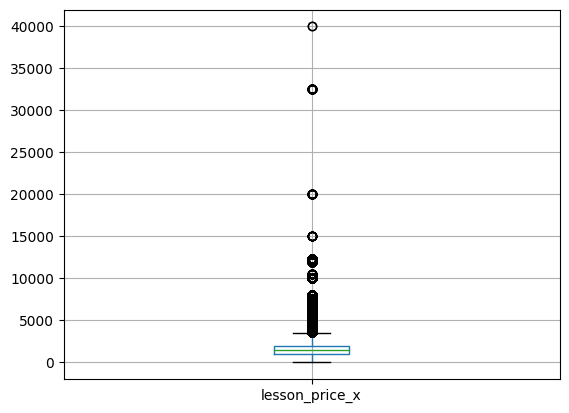

In [80]:
df.boxplot(column=['lesson_price_x'])

<Axes: >

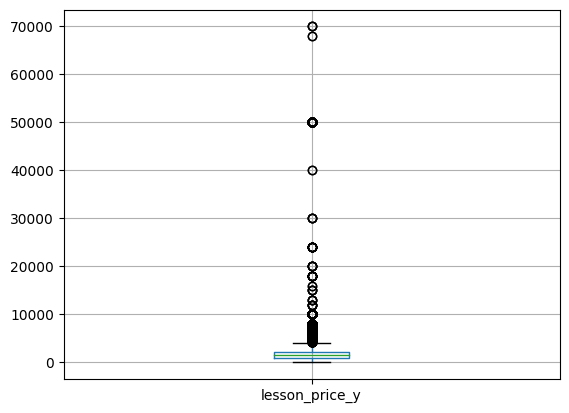

In [81]:
df.boxplot(column=['lesson_price_y'])

Проверим, с чем связана такая стоимость занятий

In [82]:
len(df[df['lesson_price_x']>10000])

818

In [83]:
len(df[df['lesson_price_y']>10000])

183

Данные похожи на выбросы, их немного, удаляем.

In [84]:
df = df[df['lesson_price_x']<=10000]

In [85]:
df = df[df['lesson_price_y']<=10000]

In [86]:
df.columns

Index(['teacher_id', 'lessons_delivered', 'mean_lesson_price', 'lessons_given',
       'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved',
       'blocked', 'reg_date', 'birth_date', 'teaching_start_date',
       'is_email_confirmed', 'lesson_duration_x', 'lesson_cost', 'is_display',
       'last_visited', 'is_cell_phone_confirmed', 'area_id', 'sex',
       'review_num', 'date_update', 'subject_id_x', 'price', 'price_external',
       'price_remote', 'lesson_id', 'lesson_course_id', 'lesson_date',
       'time_from', 'time_to', 'is_regular', 'client_id', 'order_id_x',
       'lesson_place_x', 'lesson_price_x', 'is_active', 'lesson_duration_y',
       'date_updated', 'suspend_till_date', 'order_id_y', 'order_date',
       'subject_id_y', 'lesson_price_y', 'lesson_duration', 'status_id',
       'amount_to_pay_y', 'planned_lesson_number', 'pupil_category_new_id',
       'lessons_per_week', 'minimal_price', 'teacher_sex',
       'teacher_experience_from', 'teacher_experience

In [87]:
df.teacher_experience_to.value_counts()

teacher_experience_to
0      2266729
100      10517
50        7077
10        2916
70        1652
90        1544
60        1510
42        1257
20         969
30         697
40         687
5          651
55         256
35          84
80          79
46          43
47          36
3           36
8           30
65          16
15           7
1            6
45           6
25           6
32           4
12           2
49           2
Name: count, dtype: int64

Очень много значений равных 0, возможно некорректное обучение модели. Удалим столбец.

In [88]:
df.drop('teacher_experience_to', axis= 1 , inplace = True)

In [89]:
len(df[df['teacher_age_to']>70])

161832

161832 объектов с возрастоп преподавателя более 70 лет - удалим такие объекты.

In [90]:
df['teacher_age_to'].value_counts()

teacher_age_to
0      1375788
50      313267
80       89899
55       70803
90       70350
30       64474
45       63331
40       52935
35       50491
60       45254
65       42901
25       29036
70        7363
32        4244
27        1854
52         885
29         882
53         809
75         802
28         771
37         674
31         670
63         663
56         618
38         610
68         572
48         544
33         517
26         507
46         492
47         445
62         394
58         393
100        380
43         372
72         305
41         270
59         265
54         260
66         239
36         190
57         157
22         120
42         118
23         117
24         109
8          104
67          99
19          94
34          56
76          51
74          40
39          37
51          35
44          34
49          29
5           28
61          27
20          25
64           8
73           4
16           3
11           2
69           2
228          1
Name: coun

In [91]:
df = df[df['teacher_age_to']<=70]

Text(0.5, 0.98, 'Возраст преподавателя до')

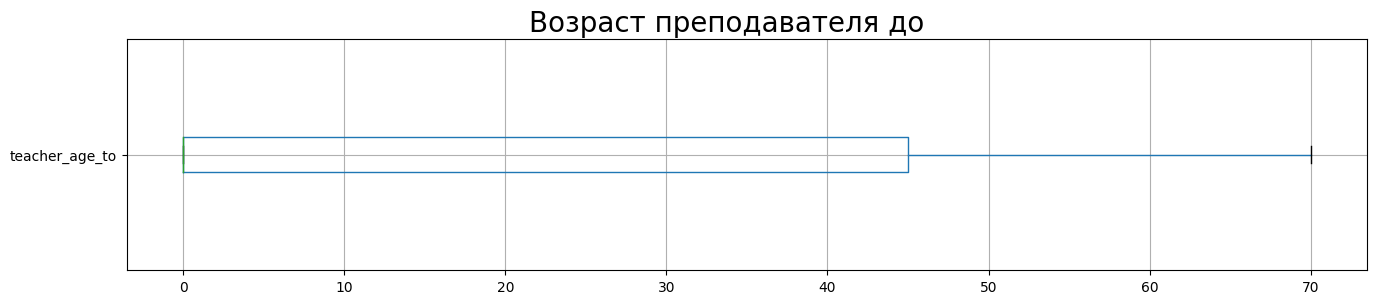

In [92]:
df.boxplot(['teacher_age_to'], figsize = (16,3), vert=False)
plt.suptitle('Возраст преподавателя до', size = 20)

Очень много значений равных 0, возможно некорректное обучение модели. Удалим столбец.

In [93]:
df.drop('teacher_age_from', axis= 1 , inplace = True)

Аномалии возраста преподавателей исключены из данных.

In [94]:
df = df.dropna().reset_index()

In [95]:
df.head(2)

,index,teacher_id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,last_visited,is_cell_phone_confirmed,area_id,sex,review_num,date_update,subject_id_x,price,price_external,price_remote,lesson_id,lesson_course_id,lesson_date,time_from,time_to,is_regular,client_id,order_id_x,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,date_updated,suspend_till_date,order_id_y,order_date,subject_id_y,lesson_price_y,lesson_duration,status_id,amount_to_pay_y,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
0,0,198013,470,1284.22,469,0.67,78.17,602300.00,0,2020-04-04,1997-04-16,2017-09-01,0,60.00,800.00,1,2022-10-21,0,2,1,10,2020-04-06,9,1700,0,1700,1706574,781280,2021-09-03,16:00:00,17:30:00,0,723033,1720858,4,1200.00,0,90.00,2021-08-31,1800-01-01,1799080,2021-09-29,8,700,60,16,0.00,10,12,5,500,3,0,4,0,0,1,0,16,1
1,2,198013,470,1284.22,469,0.67,78.17,602300.00,0,2020-04-04,1997-04-16,2017-09-01,0,60.00,800.00,1,2022-10-21,0,2,1,10,2020-04-06,8,1700,0,1700,1706574,781280,2021-09-03,16:00:00,17:30:00,0,723033,1720858,4,1200.00,0,90.00,2021-08-31,1800-01-01,1799080,2021-09-29,8,700,60,16,0.00,10,12,5,500,3,0,4,0,0,1,0,16,1


In [96]:
df = df.drop('index', axis=1)

Посмотрим поближе на категориальные данные, для этого из признаков датасета уберем числовые, которые уже посмотрели.

Список категориальных признаков

In [97]:
col_cat = [
    'reg_date', 'birth_date', 'teaching_start_date',
    'last_visited', 'date_update', 'lesson_date', 'time_from', 'time_to',
    'date_updated', 'suspend_till_date', 'order_date'
        ]
col_cat

['reg_date',
 'birth_date',
 'teaching_start_date',
 'last_visited',
 'date_update',
 'lesson_date',
 'time_from',
 'time_to',
 'date_updated',
 'suspend_till_date',
 'order_date']

В данных 11 категориальных признаков

In [98]:
df_cat = df[col_cat]
df_cat.head()

,reg_date,birth_date,teaching_start_date,last_visited,date_update,lesson_date,time_from,time_to,date_updated,suspend_till_date,order_date
0,2020-04-04,1997-04-16,2017-09-01,2022-10-21,2020-04-06,2021-09-03,16:00:00,17:30:00,2021-08-31,1800-01-01,2021-09-29
1,2020-04-04,1997-04-16,2017-09-01,2022-10-21,2020-04-06,2021-09-03,16:00:00,17:30:00,2021-08-31,1800-01-01,2021-09-29
2,2020-04-04,1997-04-16,2017-09-01,2022-10-21,2020-04-06,2022-06-10,17:00:00,18:00:00,2022-06-10,1800-01-01,2023-07-19
3,2020-04-04,1997-04-16,2017-09-01,2022-10-21,2020-04-06,2022-06-10,17:00:00,18:00:00,2022-06-10,1800-01-01,2023-07-19
4,2020-04-04,1997-04-16,2017-09-01,2022-10-21,2020-04-06,2022-06-10,17:00:00,18:00:00,2022-06-10,1800-01-01,2023-08-25


Создали таблицу для анализа категориальных данных

В категориальных данных содержаться только даты и время.

In [99]:
df_cat.describe()

,reg_date,birth_date,teaching_start_date,last_visited,date_update,lesson_date,date_updated,suspend_till_date,order_date
count,2134987,2134987,2134987,2134987,2134987,2134987,2134987,2134987,2134987
mean,2017-12-10 19:31:30.773667328,1987-02-11 13:40:57.283908544,2009-07-05 20:59:50.950202880,2022-09-27 22:44:38.682726656,2019-03-12 02:22:45.064237312,2023-02-14 13:00:39.687923968,2022-12-11 23:24:41.952817152,1834-11-24 10:24:23.025302528,2022-11-05 19:45:38.308194560
min,2008-02-16 00:00:00,1947-04-24 00:00:00,1979-09-01 00:00:00,2013-02-19 00:00:00,2008-03-06 00:00:00,2021-09-01 00:00:00,2020-09-02 00:00:00,1800-01-01 00:00:00,2021-09-01 00:00:00
25%,2016-02-29 00:00:00,1979-10-01 00:00:00,2005-09-01 00:00:00,2022-10-06 00:00:00,2017-10-11 00:00:00,2022-09-26 00:00:00,2022-08-18 00:00:00,1800-01-01 00:00:00,2022-05-16 00:00:00
50%,2018-05-31 00:00:00,1989-02-12 00:00:00,2011-09-01 00:00:00,2022-10-21 00:00:00,2019-11-16 00:00:00,2023-03-13 00:00:00,2022-12-09 00:00:00,1800-01-01 00:00:00,2022-11-06 00:00:00
75%,2020-06-07 00:00:00,1996-01-04 00:00:00,2015-09-01 00:00:00,2022-10-24 00:00:00,2021-09-02 00:00:00,2023-09-04 00:00:00,2023-06-23 00:00:00,1800-01-01 00:00:00,2023-06-01 00:00:00
max,2022-10-22 00:00:00,2004-09-24 00:00:00,2022-09-01 00:00:00,2022-10-24 00:00:00,2024-01-21 00:00:00,2024-02-01 00:00:00,2023-11-05 00:00:00,2032-07-01 00:00:00,2023-11-05 00:00:00


Аномалий в датах не обнаружено.

Из данных удалим пока все признаки с датами и временем, посмотрим на результат и оценим необходимость таких данных для обучения.

In [100]:
df.shape

(2134987, 59)

In [101]:
df.drop(col_cat, axis= 1 , inplace= True)

In [102]:
df.shape

(2134987, 48)

## Удаление идентификаторов

Список признаков идентификаторов для удаления

In [103]:
list_id = [file for file in df.columns.to_list() if '_id' in file]
list_id

['teacher_id',
 'area_id',
 'subject_id_x',
 'lesson_id',
 'lesson_course_id',
 'client_id',
 'order_id_x',
 'order_id_y',
 'subject_id_y',
 'status_id',
 'pupil_category_new_id',
 'source_id']

Удалим столбцы не дающие полезной информации для обучения модели - это признаки идентификаторы

In [104]:
df.shape

(2134987, 48)

In [105]:
df.drop(list_id, axis= 1 , inplace= True)

Удалим столбцы не дающие полезной информации для обучения модели - это признаки идентификаторы

## Кореляция

In [106]:
df.head()

,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,is_cell_phone_confirmed,sex,review_num,price,price_external,price_remote,is_regular,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,lesson_price_y,lesson_duration,amount_to_pay_y,planned_lesson_number,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_to,chosen_teachers_only,no_teachers_available,is_display_to_teachers
0,470,1284.22,469,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1200.00,0,90.00,700,60,0.00,10,5,500,3,0,4,0,0,1,0,1
1,470,1284.22,469,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1200.00,0,90.00,700,60,0.00,10,5,500,3,0,4,0,0,1,0,1
2,470,1284.22,469,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1
3,470,1284.22,469,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1
4,470,1284.22,469,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1


In [107]:
display(df.corr().style.background_gradient(cmap='summer'))

,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,is_cell_phone_confirmed,sex,review_num,price,price_external,price_remote,is_regular,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,lesson_price_y,lesson_duration,amount_to_pay_y,planned_lesson_number,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_to,chosen_teachers_only,no_teachers_available,is_display_to_teachers
lessons_delivered,1.000000,0.148189,0.963741,0.469559,0.238690,0.918218,-0.272056,-0.003278,0.006218,0.378511,0.068728,0.031195,-0.004984,0.489857,-0.148090,0.295144,0.277964,-0.042595,0.077025,0.246250,0.034303,-0.000626,0.280161,-0.008962,-0.057324,0.001106,0.025670,0.140884,0.029891,0.002094,0.047032,0.030110,-0.033920,0.054925,-0.016385,0.036658
mean_lesson_price,0.148189,1.000000,0.205577,-0.025778,0.070315,0.335424,-0.025976,0.063384,0.152830,0.612990,0.009921,0.167760,0.059409,0.060679,0.323544,0.311479,0.689860,0.006050,-0.036757,0.694576,-0.007423,0.000826,0.515633,0.103116,0.067830,0.019363,-0.003963,0.193542,0.033943,0.087937,-0.001776,0.021084,0.010699,0.068715,-0.029265,0.019666
lessons_given,0.963741,0.205577,1.000000,0.452019,0.284625,0.960631,-0.271493,0.013060,0.035059,0.427924,0.063263,0.069494,0.054821,0.440345,-0.108675,0.340202,0.353988,-0.068497,0.066289,0.307032,0.025918,-0.000583,0.321546,-0.003670,-0.052738,0.006169,0.026112,0.150030,0.044211,0.016268,0.044676,0.049980,-0.046391,0.055154,-0.031251,0.045849
lessons_started_fraction,0.469559,-0.025778,0.452019,1.000000,0.467627,0.328150,-0.339320,-0.018966,0.016391,0.123149,0.002921,0.061592,-0.191837,0.420094,-0.046686,0.143962,0.090026,0.002666,0.091768,0.061589,0.080622,0.001863,0.086336,-0.006147,-0.013678,-0.009691,0.026156,0.067845,-0.003435,0.025888,0.054129,-0.037154,-0.017398,0.060590,0.002063,-0.000251
lessons_per_pupil,0.238690,0.070315,0.284625,0.467627,1.000000,0.195887,-0.333409,-0.048324,0.006275,0.115244,-0.015141,0.104121,0.018523,0.071684,0.031566,0.046825,0.202871,-0.023282,0.111246,0.149879,0.137490,-0.000948,0.122540,-0.022576,-0.010631,0.037725,0.004311,0.070758,-0.012997,0.086256,0.070322,0.012358,0.012404,0.041195,-0.030472,0.013084
money_recieved,0.918218,0.335424,0.960631,0.328150,0.195887,1.000000,-0.215156,0.017472,0.052827,0.515167,0.048094,0.074594,0.104228,0.357976,-0.081037,0.384009,0.470108,-0.078161,0.030271,0.419876,0.003891,-0.000346,0.399171,0.004361,-0.039229,0.012039,0.023809,0.160544,0.044384,0.024559,0.029339,0.058394,-0.050136,0.061426,-0.034339,0.042406
blocked,-0.272056,-0.025976,-0.271493,-0.339320,-0.333409,-0.215156,1.000000,0.074578,0.050212,-0.114486,0.024410,-0.063635,0.031769,-0.230700,0.051916,-0.086070,-0.123388,0.051030,-0.055693,-0.115043,-0.011812,0.001944,-0.116221,-0.007885,0.000969,-0.023965,-0.036087,-0.064848,-0.003534,-0.045243,-0.025146,-0.037825,-0.011643,-0.028475,0.006370,-0.015009
is_email_confirmed,-0.003278,0.063384,0.013060,-0.018966,-0.048324,0.017472,0.074578,1.000000,-0.005074,0.004799,0.021091,0.046091,0.022692,0.103692,-0.036510,-0.039538,0.024211,0.121092,0.039000,0.011593,-0.075171,-0.000455,0.021483,0.029191,0.026831,0.012645,-0.026266,0.021951,-0.002470,0.010114,0.024673,-0.025890,0.006093,0.002048,-0.006435,0.020876
lesson_duration_x,0.006218,0.152830,0.035059,0.016391,0.006275,0.052827,0.050212,-0.005074,1.000000,0.116972,0.017594,0.038806,-0.102154,0.084786,0.175400,0.194653,0.155470,0.025734,-0.048099,0.158170,-0.091019,0.000361,0.084031,0.051289,0.018300,-0.019874,-0.002652,0.040700,-0.000370,0.037361,-0.024445,-0.047811,-0.005013,0.001452,0.002186,0.005028
lesson_cost,0.378511,0.612990,0.427924,0.123149,0.115244,0.515167,-0.114486,0.004799,0.116972,1.000000,-0.032025,0.151487,0.076445,0.173096,0.346766,0.392431,0.695522,-0.067212,0.024777,0.585930,0.032061,0.000875,0.506385,0.055919,0.035647,0.027388,0.010815,

Проверка мультиколлинеарности показала значительную зависимость признаков

lessons_delivered, lessons_given, money_recieved

удалив lessons_delivered, lessons_given, проблема мультиколлинеарности будет решена


In [108]:
df.drop(['lessons_delivered', 'lessons_given'], axis= 1 , inplace= True)

In [109]:
display(df.corr().style.background_gradient(cmap='summer'))

,mean_lesson_price,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,is_cell_phone_confirmed,sex,review_num,price,price_external,price_remote,is_regular,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,lesson_price_y,lesson_duration,amount_to_pay_y,planned_lesson_number,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_to,chosen_teachers_only,no_teachers_available,is_display_to_teachers
mean_lesson_price,1.000000,-0.025778,0.070315,0.335424,-0.025976,0.063384,0.152830,0.612990,0.009921,0.167760,0.059409,0.060679,0.323544,0.311479,0.689860,0.006050,-0.036757,0.694576,-0.007423,0.000826,0.515633,0.103116,0.067830,0.019363,-0.003963,0.193542,0.033943,0.087937,-0.001776,0.021084,0.010699,0.068715,-0.029265,0.019666
lessons_started_fraction,-0.025778,1.000000,0.467627,0.328150,-0.339320,-0.018966,0.016391,0.123149,0.002921,0.061592,-0.191837,0.420094,-0.046686,0.143962,0.090026,0.002666,0.091768,0.061589,0.080622,0.001863,0.086336,-0.006147,-0.013678,-0.009691,0.026156,0.067845,-0.003435,0.025888,0.054129,-0.037154,-0.017398,0.060590,0.002063,-0.000251
lessons_per_pupil,0.070315,0.467627,1.000000,0.195887,-0.333409,-0.048324,0.006275,0.115244,-0.015141,0.104121,0.018523,0.071684,0.031566,0.046825,0.202871,-0.023282,0.111246,0.149879,0.137490,-0.000948,0.122540,-0.022576,-0.010631,0.037725,0.004311,0.070758,-0.012997,0.086256,0.070322,0.012358,0.012404,0.041195,-0.030472,0.013084
money_recieved,0.335424,0.328150,0.195887,1.000000,-0.215156,0.017472,0.052827,0.515167,0.048094,0.074594,0.104228,0.357976,-0.081037,0.384009,0.470108,-0.078161,0.030271,0.419876,0.003891,-0.000346,0.399171,0.004361,-0.039229,0.012039,0.023809,0.160544,0.044384,0.024559,0.029339,0.058394,-0.050136,0.061426,-0.034339,0.042406
blocked,-0.025976,-0.339320,-0.333409,-0.215156,1.000000,0.074578,0.050212,-0.114486,0.024410,-0.063635,0.031769,-0.230700,0.051916,-0.086070,-0.123388,0.051030,-0.055693,-0.115043,-0.011812,0.001944,-0.116221,-0.007885,0.000969,-0.023965,-0.036087,-0.064848,-0.003534,-0.045243,-0.025146,-0.037825,-0.011643,-0.028475,0.006370,-0.015009
is_email_confirmed,0.063384,-0.018966,-0.048324,0.017472,0.074578,1.000000,-0.005074,0.004799,0.021091,0.046091,0.022692,0.103692,-0.036510,-0.039538,0.024211,0.121092,0.039000,0.011593,-0.075171,-0.000455,0.021483,0.029191,0.026831,0.012645,-0.026266,0.021951,-0.002470,0.010114,0.024673,-0.025890,0.006093,0.002048,-0.006435,0.020876
lesson_duration_x,0.152830,0.016391,0.006275,0.052827,0.050212,-0.005074,1.000000,0.116972,0.017594,0.038806,-0.102154,0.084786,0.175400,0.194653,0.155470,0.025734,-0.048099,0.158170,-0.091019,0.000361,0.084031,0.051289,0.018300,-0.019874,-0.002652,0.040700,-0.000370,0.037361,-0.024445,-0.047811,-0.005013,0.001452,0.002186,0.005028
lesson_cost,0.612990,0.123149,0.115244,0.515167,-0.114486,0.004799,0.116972,1.000000,-0.032025,0.151487,0.076445,0.173096,0.346766,0.392431,0.695522,-0.067212,0.024777,0.585930,0.032061,0.000875,0.506385,0.055919,0.035647,0.027388,0.010815,0.181630,0.040160,0.057017,0.048103,0.038845,-0.003037,0.070879,-0.046443,0.023230
is_display,0.009921,0.002921,-0.015141,0.048094,0.024410,0.021091,0.017594,-0.032025,1.000000,0.019158,-0.041758,0.046581,0.017605,-0.012442,-0.010128,0.005620,0.018440,0.010757,-0.000851,0.000233,-0.003668,0.004386,-0.004440,-0.006478,0.016816,0.007850,0.000113,0.019625,0.000447,0.007514,0.012980,0.007767,0.000125,0.003548
is_cell_phone_confirmed,0.167760,0.061592,0.104121,0.074594,-0.063635,0.046091,0.038806,0.151487,0.019158,1.000000,0.012998,0.038592,0.171400,0.239337,0.214908,-0.012178,-0.000975,0.154876,0.081139,-0.000096,0.100573,-0.001297,0.040482,-0.008224,0.011406,0.038624,0.005532,0.041120,0.007007,0.027876,-0.011007,0.028544,-0.013461,-0.007811


Столбцы, дающие мультиколлинеарность удалены

## Подготовка данных к обучению

## Выделение целевого признака

In [110]:
df.blocked.isna().mean()

0.0

In [111]:
df.head()

,mean_lesson_price,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration_x,lesson_cost,is_display,is_cell_phone_confirmed,sex,review_num,price,price_external,price_remote,is_regular,lesson_place_x,lesson_price_x,is_active,lesson_duration_y,lesson_price_y,lesson_duration,amount_to_pay_y,planned_lesson_number,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_to,chosen_teachers_only,no_teachers_available,is_display_to_teachers
0,1284.22,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1200.00,0,90.00,700,60,0.00,10,5,500,3,0,4,0,0,1,0,1
1,1284.22,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1200.00,0,90.00,700,60,0.00,10,5,500,3,0,4,0,0,1,0,1
2,1284.22,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1
3,1284.22,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1
4,1284.22,0.67,78.17,602300.00,0,0,60.00,800.00,1,0,1,10,1700,0,1700,0,4,1000.00,0,60.00,1500,60,0.00,10,3,0,0,0,4,0,0,0,0,1


Выделяем целевой признак

In [112]:
y = df['blocked']

Обучающие признаки

In [113]:
X = df.drop(['blocked'] , axis=1)

## Разделение данных на обучающую 75% и тестовую выборку 25%

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,shuffle=True, random_state=42
    )

In [115]:
X_train.shape

(1601240, 33)

In [116]:
X_test.shape

(533747, 33)

In [117]:
y_train.shape

(1601240,)

In [118]:
y_test.shape

(533747,)

 При кросс-валидации и подборе гиперпараметров через GridSearchCV/RandomizedSearchCV на каждой итерации происходит разбиение на трейн и тест. Предобработка признаков (масштабирование, кодирование, векторизация) каждый раз должна проводиться независимо, иначе происходит утечка данных.

**************

''' Определение оптимального порога с помощью roc_curve
''' Найдем индексы ложноположительных и ложноотрицательных результатов
fp = (y_test == 0) & (predictions_test == 1)
fn = (y_test == 1) & (predictions_test == 0)
''' Предсказание вероятностей для класса 1
probabilities_test_filtered = model_filtered.predict_proba(X_test_filtered)[:, 1]

''' ''' Определяем новый порог
threshold = 0.5

''' Получаем новые предсказания на основе порога
predictions_with_new_threshold = (probabilities_test_filtered >= threshold).astype(int)

''' Расчет F1-меры с новым порогом
f1_with_new_threshold = f1_score(y_test, predictions_with_new_threshold)

print(f'F1-мера на тестовом наборе с стандартным порогом: {f1_with_new_threshold}')


fpr, tpr, thresholds = roc_curve(y_test, probabilities_test_filtered)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Оптимальный порог: {optimal_threshold}')

''' Предсказание вероятностей для класса 1
probabilities_test_filtered = model_filtered.predict_proba(X_test_filtered)[:, 1]

''' Определяем новый порог
threshold = optimal_threshold

''' Получаем новые предсказания на основе порога
predictions_with_new_threshold = (probabilities_test_filtered >= threshold).astype(int)

''' Расчет F1-меры с новым порогом
f1_with_new_threshold = f1_score(y_test, predictions_with_new_threshold)

print(f'F1-мера на тестовом наборе с новым порогом: {f1_with_new_threshold}')

Сохраним данные для быстрого их получения

In [119]:
# X_train.to_csv('/content/X_train.csv')

In [120]:
# X_test.to_csv('/content/X_test.csv')

In [121]:
# y_train.to_csv('/content/y_train.csv')

In [122]:
# y_test.to_csv('/content/y_test.csv')

In [123]:
# X_train = pd.read_csv('/content/X_train.csv', index_col=[0])

In [124]:
# X_test = pd.read_csv('/content/X_test.csv', index_col=[0])

In [125]:
# y_train = pd.read_csv('/content/y_train.csv', index_col=[0])

In [126]:
# y_test = pd.read_csv('/content/y_test.csv', index_col=[0])

In [127]:
'''
from category_encoders.helmert import HelmertEncoder
he = HelmertEncoder(drop_invariant=True)
X_train = he.fit_transform(X_train)
'''

'\nfrom category_encoders.helmert import HelmertEncoder\nhe = HelmertEncoder(drop_invariant=True)\nX_train = he.fit_transform(X_train)\n'

## Масштабирование признаков

Приведение значений признаков к единому масштабу.
Для выборки train применяется метод fit и transform совместно - fit_transform, а для выборки test - transform

In [128]:
list_1 = list(X_train.columns)

numeric = list_1

scaler = StandardScaler()

X_train[numeric] = scaler.fit_transform(X_train[numeric])

X_test[numeric] = scaler.transform(X_test[numeric])

## Обучение моделей

Вместе с обучением моделей проведем оценку важности признаков. Такой анализ позволяет понять насколько признаки способны спрогнозировать целевую переменную.
                
- лучшее понимание данных
        
- лучшее понимание модели
        
- возможность уменьшить количество признаков - особенно важно для большого объема данных, тяжелых моделей, в случаях когда нужна высокая скорость обучения/сокращение времени

Функция для визуализации важности признаков при

### XGBoost-модель

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

predicted_xgb  = model_xgb .predict(X_test)
f1_xgb  = round(f1_score(y_test, predicted_xgb), 3)
print ("F1 = ", f1_xgb)

F1 =  1

pipe = make_pipeline(XGBClassifier(n_estimators = 1300, learning_rate=0.04, random_state = 42))
score = cross_val_score(pipe, X_train, y_train, scoring = "f1", cv = 4)
print(score)
print("f1" %(-1 * score.mean()))


F1 =  1

### Gradient Boosting

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

predicted_gb = model_gb.predict(X_test)
f1_gb = round(f1_score(y_test, predicted_gb), 3)
print ("F1 = ", f1_gb)

F1 =  0.87

Очевидно, что модели XGBoost переобучается еа текущем датасете.  Модель GradientBoostingClassifier ведет себя лучше, нужно проверять дополнительно, т.к. довольно высокое значение F1 = 0.87 смущает.

Будем проверять более простые и "легкие" модели

### Дерево решений

best_model_dtc = None
best_result_dtc = 0
for depth in range(1, 10):
    model_dtc = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model_dtc.fit(X_train, y_train)
    result_dtc = model_dtc.score(X_test, y_test)

    if result_dtc > best_result_dtc:
        best_model_dtc =  model_dtc
        best_result_dtc = result_dtc

print("Score наилучшей модели решающее дерево на валидационной выборке:", best_result_dtc)
print(best_model_dtc)

predicted_dtc = model_dtc.predict(X_test)
f1_dtc = round(f1_score(y_test, predicted_dtc), 3)
print ("F1 = ", f1_dtc)



Score наилучшей модели решающее дерево на валидационной выборке: 0.95879
DecisionTreeClassifier(max_depth=9, random_state=42)
F1 =  0.89

Модель DecisionTreeClassifier тоже имеет неожиданно высокое значение F1 = 0.89, похоже на переобучение, нужно более глубоко поработать с гиперпараметрами.

In [129]:
# X_train_1 = X_train.head(100000)
# y_train_1 = y_train.head(100000)

### Случайный лес

{'n_estimators': 4, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 13}

model_rfc = RandomForestClassifier(random_state=42)  

params = {  
    'n_estimators':[x for x in range(64, 65, 1)],  
    'min_samples_split':[x for x in range(30, 31, 1)],  
    'min_samples_leaf':[x for x in range(38, 39, 1)],  
    'max_depth':[x for x in range(18, 19, 1)]  
}

grid = RandomizedSearchCV(model_rfc, params, n_iter=10,   random_state=42, cv=15)  
grid.fit(X_train_1, y_train_1)  
print('Лучший результат:')  
print(grid.best_params_)  
predicted_rfc = grid.predict(X_test)

Лучший результат:
{'n_estimators': 64, 'min_samples_split': 30, 'min_samples_leaf': 38, 'max_depth': 18}

Еще один запуск rfc, но с конкретными параметрами.

In [130]:
X_train.shape

(1601240, 33)

In [131]:
model_rfc = RandomForestClassifier(
    n_estimators=4, min_samples_split=2,
    min_samples_leaf=4, max_depth=8, random_state=42
    )

model_rfc.fit(X_train, y_train)

predicted_rfc = model_rfc.predict(X_test)

f1_rfc = round(f1_score(y_test, predicted_rfc), 3)
print ("F1 = ", f1_rfc)

F1 =  0.803


Модель RandomForestClassifier пока самая  перспективная, оценка качества на данном этапе показала f1 = 0.8 с перспективой улучшения путем генерации новых признаков и оптимизации гиперпараметров. Проведем оценку важности признаков.

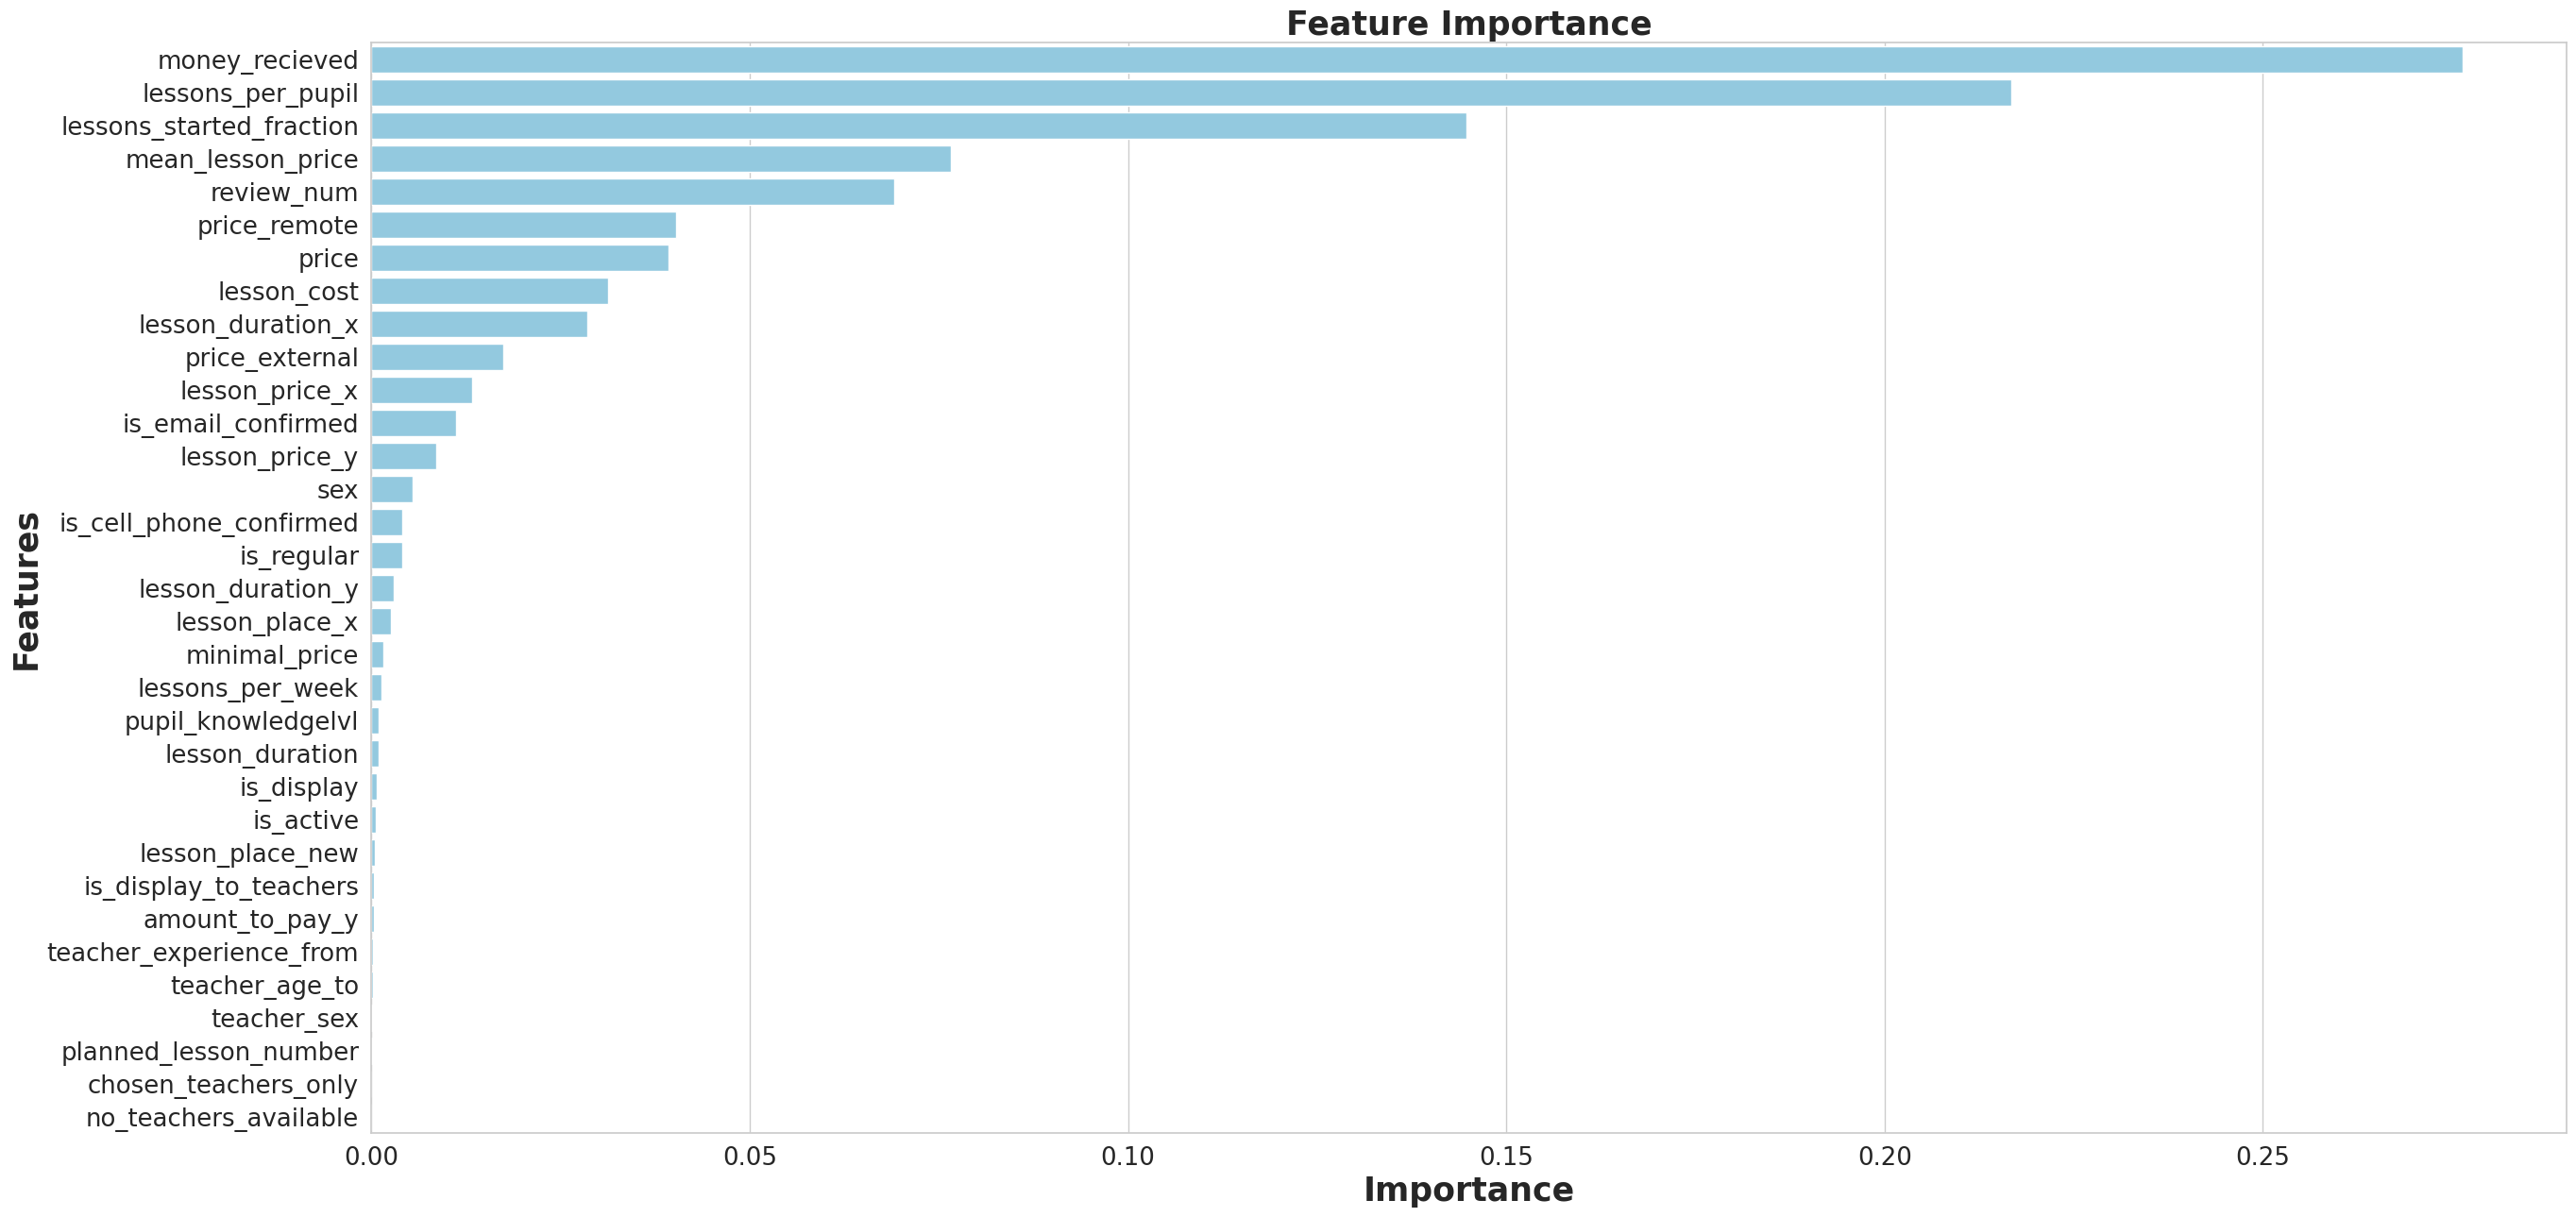

None

,Features,Gini-Importance
0,money_recieved,0.28
1,lessons_per_pupil,0.22
2,lessons_started_fraction,0.14
3,mean_lesson_price,0.08
4,review_num,0.07
5,price_remote,0.04
6,price,0.04
7,lesson_cost,0.03
8,lesson_duration_x,0.03
9,price_external,0.02


In [132]:
feats = {}
for feature, importance in zip(X_train.columns, model_rfc.feature_importances_):
    feats[feature] = importance
importances_rfc = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances_rfc = importances_rfc.sort_values(by='Gini-Importance', ascending=False)
importances_rfc = importances_rfc.reset_index()
importances_rfc = importances_rfc.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_rfc['Gini-Importance'], y=importances_rfc['Features'], data=importances_rfc, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_rfc)

Примем, что неважные признаки это те, котрые имеют значение Importance менее 0,03, т.е. равные 0, их больше половины.

In [133]:
col_not_important_rfc = importances_rfc[importances_rfc['Gini-Importance']<.03]['Features'].to_list()
col_not_important_rfc

['lesson_duration_x',
 'price_external',
 'lesson_price_x',
 'is_email_confirmed',
 'lesson_price_y',
 'sex',
 'is_cell_phone_confirmed',
 'is_regular',
 'lesson_duration_y',
 'lesson_place_x',
 'minimal_price',
 'lessons_per_week',
 'pupil_knowledgelvl',
 'lesson_duration',
 'is_display',
 'is_active',
 'lesson_place_new',
 'is_display_to_teachers',
 'amount_to_pay_y',
 'teacher_experience_from',
 'teacher_age_to',
 'teacher_sex',
 'planned_lesson_number',
 'chosen_teachers_only',
 'no_teachers_available']

In [134]:
len(col_not_important_rfc)

25

### Логистическая регрессия

Без подбора гиперпараметров показатель качества f1 = 0.573
Обучение модели LogisticRegression многократно заканчивалось ошибкой, связанной с недостатком оперативной памяти.

Перспектива:
1. Генерация новых признаков
2. Оптимизация гиперпараметров.

In [ ]:
model_lr = LogisticRegression(class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   multi_class='auto', n_jobs=None,
                   random_state=42, tol=0.0001, warm_start=False)

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              { 'max_iter':[x for x in range(0, 1000, 100)]}
              ]

grid_search = GridSearchCV(estimator = model_lr, param_grid = parameters,
                           scoring = 'f1', cv = 5, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
predicted_lr = grid_search.predict(X_test)

f1_lr = round(f1_score(y_test, predicted_lr), 3)
print ("F1 = ", f1_lr)

F1 =  0.573


LogisticRegression, тоже можно считать перспективной моделью, следует проработать более глубоко гиперпараметры и удалить неважные признаки.

## Вывод

Для прогнозирования статуса репетитора добросовестный он или нет разработаны модели, которые по имеющейся информации о репетиторе и проведенных им занятий классифицирует репетиторов.  
Оценка качества модели проведена по метрике F1.

Применен стек технологий:

•	Python    
•	Pandas  
•	Numpy  
•	Matplotlib, seaborn  
•	Scikit-learn  
•	DecisionTreeClassifier  
•	GradientBoostingClassifier  
•	XGBClassifier  
•	RandomForestClassifier  

Обучены 5 моделей:  
-	XGBClassifier - перобучение
-	GradientBoostingClassifier - перобучение
-	DecisionTreeClassifier - возможно перобучение, как вариант,можно использовать в качестве составляющней ансамблиевого метода.
- LogisticRegression - перспективная модель, низкий показатель качества f1 = 0.573
-	RandomForestClassifier - самая перспективная модель f1 = 0.803, возможные пути улучшение критерия качества:
    1. генерация новых признаков, основанных не на абсолютных значениях, а на отношении и долях - более стойкая модель на перспективу.
    2. оптимизация гиперпараметров
    3. удаление признаков на основании анализа Feature importance